# Homework 3, Part 2: Matrices (25 points)

## Step 2.1: Simple image manipulation

Your task is to write a function `convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale)` that, given a color image array, returns a grayscale, cropped, new copy of the image with increased contrast.
 
Perform the steps in the following order:

1. *Cropping*:  you should crop the image appropriately according to the `crop_left, crop_bottom, crop_right`, and `crop_top` parameters (which you can safely assume will be non-negative).


2. *Converting to grayscale*:  you should average (compute the mean) of the $(R, G, B)$ values associated with each pixel.  For example, an RGB pixel $(100, 108, 104)$ would become the single grayscale value 104.  This has the effect of reducing the dimension of the image array from 3D (x,y,channel) to 2D (x,y).


3. *Increasing contrast*:  you should first compute the *median* grayscale pixel value across the entire image.  For every pixel with value *below* the median, scale its grayscale value down by the percentage specified in `contrast_scale` (which should be a real value from 0 to 1).  For every pixel with value *above* the median, scale its grayscale value up by the percentage specified in `contrast_scale`.  A `contrast_scale` of 0 corresponds to not changing the grayscale pixel values at all.  Do not let grayscale values fall outside of the range $[0, 255]$; you may need to threshold them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# TODO: Write your image conversion function here
# Worth 12 points

# YOUR CODE HERE
def convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale):
    
    # cropping
    im = image[crop_top:-crop_bottom, crop_left:-crop_right]
        
    # convert to grayscale
    im_gray = np.mean(im, axis=(2))

    # increase contrast
    if contrast_scale != 0:
        med_pix = np.median(im_gray)   # calculate median grayscale pixel value
        below_med = im_gray < med_pix  # create index of pixels below this value
        above_med = im_gray > med_pix  # create index of pixels above this value
        im_gray[above_med] = im_gray[above_med]*(1+contrast_scale)
        im_gray[below_med] = im_gray[below_med]*(contrast_scale)

        # threshold
        above_thresh = im_gray > 255
        below_thresh = im_gray < 0
        im_gray[above_thresh] = 255
        im_gray[below_thresh] = 0

    return im_gray

In [3]:
# Simple test
data = plt.imread('data-behind-everything.jpg')
gray_data = convert_to_grayscale(data, 10, 50, 10, 45, 0.3)

gray_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

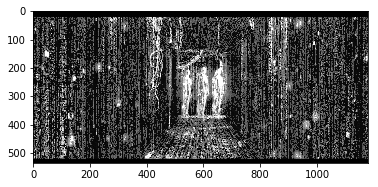

In [4]:
plt.imshow(gray_data, cmap=plt.cm.gray)

## Step 2.2 The term-document matrix

_This part is adapted from data in:_

Landauer, T. K., Foltz, P. W., \& Laham, D. (1998). An introduction to latent semantic analysis.  
_Discourse processes, 25_(2-3), 259-284.

Consider the following 5 documents on human-(c)omputer interaction and 4 documents on (m)athematical graph theory.  
We will focus on the _italicized_ words.

**c1:** _Human_ machine _interface_ for ABC _computer_ applications  
**c2:** A _survey_ of _user_ opinion of _computer system response time_  
**c3:** The _EPS user interface_ management _system_  
**c4:** _System_ and _human system_ engineering testing of _EPS_  
**c5:** Relation of _user_ perceived _response time_ to error measurement  

**m1:** The generation of random, binary, ordered _trees_  
**m2:** The intersection _graph_ of paths in _trees_  
**m3:** _Graph minors_ IV: Widths of _trees_ and well-quasi-ordering  
**m4:** _Graph minors_: A _survey_  

Generate the term-document matrix for this dataset as a Pandas DataFrame, ignoring uppercases and plurals.  
Order the words based on their first appearances in the dataset.

In [24]:
# TODO: create the docs_df DataFrame in this cell
# Worth 20 points

# YOUR CODE HERE
import pandas as pd

data = {'c1':[1,1,1,0,0,0,0,0,0,0,0,0],
        'c2':[0,0,1,1,1,1,1,1,0,0,0,0],
        'c3':[0,1,0,0,1,1,0,0,1,0,0,0],
        'c4':[1,0,0,0,0,2,0,0,1,0,0,0],
        'c5':[0,0,0,0,1,0,1,1,0,0,0,0],
        'm1':[0,0,0,0,0,0,0,0,0,1,0,0],
        'm2':[0,0,0,0,0,0,0,0,0,1,1,0],
        'm3':[0,0,0,0,0,0,0,0,0,1,1,1],
        'm4':[0,0,0,1,0,0,0,0,0,0,1,1]}
ind = ['human','interface','computer','survey','user','system','response','time','eps','trees','graph','minors']
docs_df = pd.DataFrame(data,index=ind)

In [6]:
if docs_df.shape != (12, 9):
    raise ValueError('unexpected dimensions')


In [7]:
if docs_df.columns[0] != "c1":
    raise ValueError('unexpected column name')


In [8]:
if docs_df.columns[1] != "c2":
    raise ValueError('unexpected column name')


In [9]:
if docs_df.columns[2] != "c3":
    raise ValueError('unexpected column name')


In [10]:
if docs_df.columns[3] != "c4":
    raise ValueError('unexpected column name')


In [11]:
if docs_df.columns[4] != "c5":
    raise ValueError('unexpected column name')


In [12]:
if docs_df.columns[5] != "m1":
    raise ValueError('unexpected column name')


In [13]:
if docs_df.columns[6] != "m2":
    raise ValueError('unexpected column name')


In [14]:
if docs_df.columns[7] != "m3":
    raise ValueError('unexpected column name')


In [15]:
if docs_df.columns[8] != "m4":
    raise ValueError('unexpected column name')


## 4.3 Matrix evaluation metrics

Write a function `matrix_eval` that returns the Frobenius norm, the determinant, the rank, the eigenvalues, and the singular values of a given matrix as a 5-tuple. If the metric is not defined, return `nan` or `[nan]` for that metric, as appropriate.

In [16]:
# TODO: write the matrix_eval function in this cell
# Worth 8 points

# YOUR CODE HERE
def matrix_eval(matrix):
    
    try:
        frob_norm = np.linalg.norm(matrix)
    except np.linalg.LinAlgError:
        frob_norm = np.nan

    try:
        determ = np.linalg.det(matrix)
    except np.linalg.LinAlgError:
        determ = np.nan
        
    try:
        rank = np.linalg.matrix_rank(matrix)
    except np.linalg.LinAlgError:
        rank = np.nan
  
    try:
        eigenval, v = np.linalg.eig(matrix)
    except np.linalg.LinAlgError:
        eigenval = [np.nan]

    try:
        singval = np.linalg.svd(matrix, compute_uv=False)
    except np.linalg.LinAlgError:
        singval = [np.nan]
    
    return (frob_norm, determ, rank, eigenval, singval)

In [17]:
A = np.array(docs_df)

metrics = matrix_eval(A)
metrics


(5.5677643628300215,
 nan,
 9,
 [nan],
 array([ 3.34088375,  2.541701  ,  2.35394352,  1.64453229,  1.50483155,
         1.30638195,  0.84590308,  0.56013442,  0.36367684]))

In [18]:
matrix_eval(A[:9, :])


(4.7958315233127191,
 0.0,
 6,
 array([ 0.0+0.j       ,  0.0+0.j       ,  0.0+0.j       ,  1.0+0.j       ,
        -1.0+0.j       ,  2.0+0.j       ,  0.5+0.8660254j,  0.5-0.8660254j,
        -1.0+0.j       ]),
 array([ 3.33885706,  2.37627279,  1.64446727,  1.41421356,  1.0939639 ,
         0.55166254,  0.        ,  0.        ,  0.        ]))

In [19]:
matrix_eval(A @ A.T)


(14.594519519326424, 0.0, 9, array([  1.11615042e+01 +0.00000000e+00j,
          6.46024397e+00 +0.00000000e+00j,
          5.54105008e+00 +0.00000000e+00j,
          2.70448646e+00 +0.00000000e+00j,
          2.26451800e+00 +0.00000000e+00j,
          1.70663380e+00 +0.00000000e+00j,
          7.15552025e-01 +0.00000000e+00j,
          3.13750572e-01 +0.00000000e+00j,
          1.32260844e-01 +0.00000000e+00j,
         -2.23618300e-16 +0.00000000e+00j,
          1.54583573e-16 +3.71107183e-17j,   1.54583573e-16 -3.71107183e-17j]), array([  1.11615042e+01,   6.46024397e+00,   5.54105008e+00,
          2.70448646e+00,   2.26451800e+00,   1.70663380e+00,
          7.15552025e-01,   3.13750572e-01,   1.32260844e-01,
          3.56379660e-16,   4.63529076e-17,   1.38272659e-17]))

In [20]:
matrix_eval(A.T @ A)


(14.594519519326424,
 124.00000000000014,
 9,
 array([ 11.16150425,   6.46024397,   5.54105008,   2.70448646,
          2.264518  ,   1.7066338 ,   0.71555203,   0.13226084,   0.31375057]),
 array([ 11.16150425,   6.46024397,   5.54105008,   2.70448646,
          2.264518  ,   1.7066338 ,   0.71555203,   0.31375057,   0.13226084]))

## 4.4 Matrix approximation

Write a function `approx_matrix` that approximates a matrix using the first `n` singular values, given `n`. Return the loss, defined as the Frobenius norm of the original minus the approximated version, divided by the Frobenius norm of the original.

In [21]:
# TODO: create the approx_matrix function here
# Worth 10 points

# YOUR CODE HERE
def approx_matrix(matrix,n):
    # calculate singular values
    u, s, vh = np.linalg.svd(matrix)
    
    # take first n values
    s = s[:n]
    u = u[:,:n]
    vh = vh[:n]
    
    # approximate matrix
    approx_mat = (u * s) @ vh
    
    # calculate Frobenius norm for each case & loss
    frob_norm = np.linalg.norm(matrix)
    frob_norm_approx = np.linalg.norm(matrix-approx_mat)
    loss = frob_norm_approx/frob_norm
    
    return loss

In [22]:
simple = np.array([[1,2],[3,4]])
approx_matrix(simple, 1)


0.066815979296745681

In [23]:
approx_matrix(simple, 2)


2.2932668186396046e-16